In [1]:
# Khai báo thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans

print('Khai báo thư viện thành công')

Khai báo thư viện thành công


In [2]:
# Tạo tệp dữ liệu tên là data bằng pandas đọc dữ liệu đầu vào
data = pd.read_csv('Case_study_CarPrice_Assignment.csv')
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
# Dùng hàm shape kiểm tra cột và dòng, hàm dtypes kiểm tra kiểu dữ liệu của từng cột trong dữ liệu
print('Số dòng của data là:', data.shape[0], ', Số cột của data là:', data.shape[1])
print('Các kiểu dữ liệu của từng cột trong data:')
data.dtypes.to_frame()

Số dòng của data là: 205 , Số cột của data là: 26
Các kiểu dữ liệu của từng cột trong data:


,0
car_ID,int64
symboling,int64
CarName,object
fueltype,object
aspiration,object
doornumber,object
carbody,object
drivewheel,object
enginelocation,object
wheelbase,float64


In [4]:
# Tính giá trị thống kê của tất cả các biến định lượng trong DataFrame 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


## 1. Tiền xử lý dữ liệu
- 1 Kiểm tra dữ liệu khuyết thiếu trong data

In [5]:
# dùng for qua để kiểm tra từng cột xem có cột nào có chứa dữ liệu khuyết thiếu
flag = False
for index, column in enumerate(data.columns):
    temp = data[column].isna()
    if temp.sum() > 0:
        print('Cột', data.columns[index], 'chứa' , temp.sum() , 'giá trị KT')
        flag = True
if not flag:
    print('Thông qua kiểm tra thì chúng ta có thể thấy là data không có dữ liệu khuyết thiếu nào.')


Thông qua kiểm tra thì chúng ta có thể thấy là data không có dữ liệu khuyết thiếu nào.


- 2 Tìm mối liên hệ giữa hãng xe và tên xe, phát hiện và sửa sai dữ liệu

In [6]:
# Tách cột dữ liệu có kiểu chuỗi
car_company_name = data['CarName'].str.split()

# Lấy chuỗi kí tự đầu trong 1 list của biến car_company_name
name = car_company_name.str[0]

# Tạo cột car_company_name(Tên hãng xe) vào vị trị thứ 2 sau cột symboling bằng hàm insert
data.insert(2,'car_company_name',name)

# Tạo biến để kiểm tra tên hãng và số lượng
test = data['car_company_name'].unique()
test

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

- Thông qua kiểm tra chúng ta có thể thấy có rất nhiều tên hãng xe bị sai.
  - maxda bị sai tên đổi thành mazda
  - Nissan chúng ta có thể đổi về nissan để đồng bộ dữ liệu không viết hoa
  - porcshce tên bị sai đổi thành porsche
  - toyouta tên bị sai đổi thành toyota
  - vokswagen và vw tên bị sai đổi thành volkswagen

In [7]:
# Dùng Hàm replace để thay đổi tên bị sai
data['car_company_name'].replace({'vw':'volkswagen','vokswagen':'volkswagen','Nissan':'nissan',
                                  'toyouta':'toyota','maxda':'mazda','porcshce':'porsche'},inplace=True)

# Kiểm tra hàm replace có hoạt động và thay đổi còn bao nhiêu tên hãng sau khi xử lý
if len(test) == len(data['car_company_name'].unique()):
    print('Tên hãng bị sai tên chưa được sửa đổi,tên hãng còn lại:',len(test))
else:
    print('Tên hãng bị sai tên đã được sửa đổi,tên hãng còn lại:', len(data['car_company_name'].unique()))
    

Tên hãng bị sai tên đã được sửa đổi,tên hãng còn lại: 22


- 3-Xem xét kiểu dữ liệu của các thuộc tính, thực hiện chuyển đổi về đúng kiểu
    - Sau khi xem xét qua từng thuộc tính ta có thể thấy có 2 cột doornumber và cylindernumber ở dạng object ta có thể chuyển đổi về dạng int để có thể kiểm tra tính định lượng
        - Cột doornumber dữ liệu có  [four,two] ta có thể đổi về dạng int [4,2]
        - Cột cylindernumber dữ liệu có ['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'] ta có thể đổi về dạng int [ 4,  6,  5,  3, 12,  2,  8]

In [8]:
# Dùng For kiểm tra từng cột xem có cần thay đổi kiểu dữ liệu nào không
# for i in data.columns:
#         print('Tên cột:',i)
#         print((data[f'{i}'].unique()))

In [9]:
# Sửa cột doornumber
# dùng hàm Where của numpy thay đổi giá trị của cột doornumber
data['doornumber'] = np.where(data['doornumber'] == 'four',4,2)
print(data['doornumber'].value_counts())

4    115
2     90
Name: doornumber, dtype: int64


In [10]:
# Sửa cột cylindernumber
data['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [11]:
# dùng select của numpy để thay đổi dữ liệu cột cylindernumber
condition = [(data['cylindernumber']=='two'),(data['cylindernumber']=='three'),(data['cylindernumber']=='four'),
             (data['cylindernumber']=='five'),(data['cylindernumber']=='six'),(data['cylindernumber']=='eight'),
             (data['cylindernumber']=='twelve')]
choices = [2,3,4,5,6,8,12]
data['cylindernumber'] = np.select(condition,choices)

# Kiểm tra lại xem sửa thông tin đã chính xác chưa
data['cylindernumber'].value_counts()

4     159
6      24
5      11
8       5
2       4
3       1
12      1
Name: cylindernumber, dtype: int64

- 4 Xử lý dữ liệu ngoại lai

In [12]:
# Lọc dữ liệu thuộc định lượng ra để xử lý ngoại lai nếu không sẽ báo lỗi 
df = data.loc[:,['car_ID','symboling','doornumber','wheelbase','carlength','carwidth','carheight',
                'curbweight','cylindernumber','enginesize','boreratio','stroke','compressionratio','horsepower',
                'peakrpm','citympg','highwaympg','price']]

In [13]:
# Dùng  IQR Score để xử lý dữ liệu ngoại lai
Q1= df.quantile(0.25)
Q3= df.quantile(0.75)
IQR= Q3-Q1
df1 = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
print(f'Sau khi loại bỏ dữ liệu ngoại lai thì data còn {data.shape[0]-(data.shape[0]-df1.shape[0])} dòng, các dòng bị loại bỏ này chủ yếu là các mẫu xe có thông số kỹ thuật đặc biệt\
 và có 1 số hãng thuộc phân khúc hạng sang và bảng dữ liệu có {data.shape[0]} dòng nếu xóa có thể ảnh hưởng nhiều đến bảng dữ liệu nên chúng ta không nên xóa.')


Sau khi loại bỏ dữ liệu ngoại lai thì data còn 118 dòng, các dòng bị loại bỏ này chủ yếu là các mẫu xe có thông số kỹ thuật đặc biệt và có 1 số hãng thuộc phân khúc hạng sang và bảng dữ liệu có 205 dòng nếu xóa có thể ảnh hưởng nhiều đến bảng dữ liệu nên chúng ta không nên xóa.


# 2. Tiến hành phân tích mối liên hệ của từng thuộc tính với price bằng các biểu đồ mô tả tần số, tần suất, các phép kiểm định
- Tiến hành chia phân khúc các hãng xe làm 3 loại (High, Average, Low):
    - Lý do chia như này để ta có thể hiểu hơn vì sao các hãng thuộc High lại có giá bán cao hơn các hãng thuộc phân khúc khác hay vì sao các hãng thuộc Low lại có giá thấp hơn.

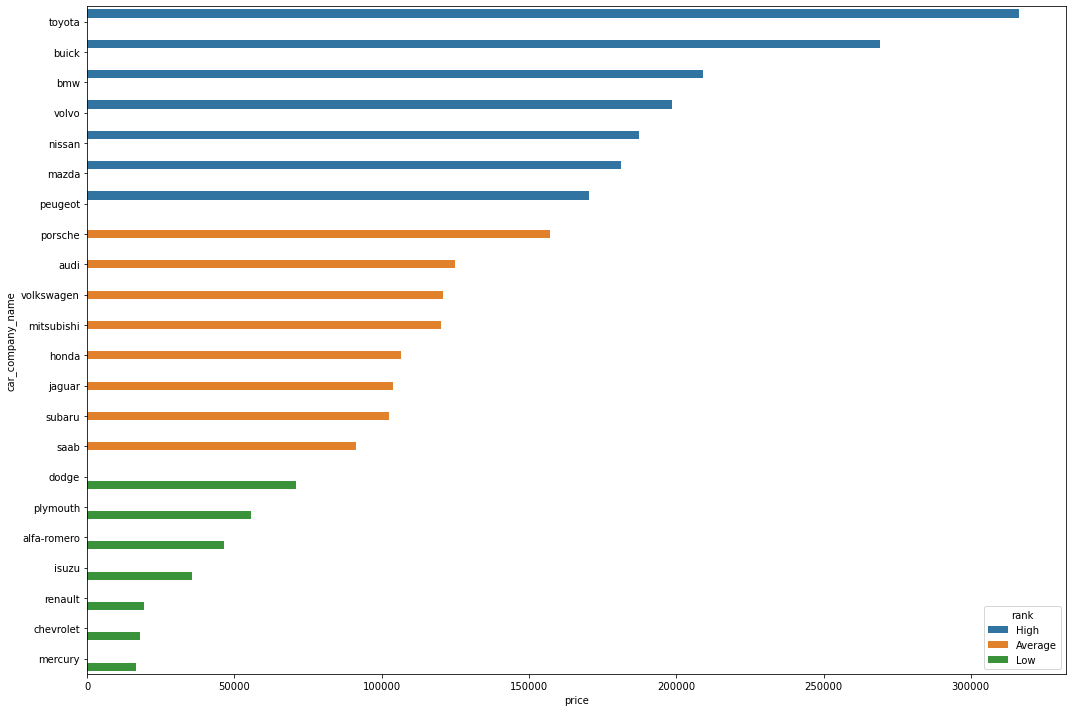

In [14]:
# Biểu đồ mối liên hệ Hãng với Price xem hãng nào có mức giá bán cao nhất
plt.figure(figsize=(15, 10))

# lọc cột car_company_name với tổng giá bằng groupby và sắp xếp lại bảng từ lớn xuống nhỏ
car_company_name_price = data.groupby('car_company_name')['price'].sum().sort_values(ascending=False).to_frame()

#
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(np.array(car_company_name_price.price).reshape(-1,1))

# Phân loại hãng xe có mới giá bán 
car_company_name_price['rank'] = kmeans.labels_
car_company_name_price['rank'].replace(0,'Average',inplace=True)
car_company_name_price['rank'].replace(1,'High',inplace=True)
car_company_name_price['rank'].replace(2,'Low',inplace=True)

# Dựng biểu đồ
sns.barplot(x = car_company_name_price.price, y = car_company_name_price.index, orient = 'h', hue = car_company_name_price['rank'])
# sns.set(rc = {'figure.figsize':(15,5)})
plt.tight_layout()
plt.show()

- Các chỉ số trên tuy mức độ số lượng xe khác nhau nhưng ta có thể thấy các loại High và Average có rất nhiều hãng nổi tiếng với loại hãng hạng sang(BMW,Audi,Porsche) và hãng phổ biến(Toyota,Mazda,Honda,...) trên thế giới. các hãng còn lại ta có thể thấy là các hãng không phổ biến hay là loại sang nào.

In [15]:
data[data['car_company_name']=='toyota'].sort_values(by='price',ascending=False).head().T

,172,178,179,181,180
car_ID,173,179,180,182,181
symboling,2,3,3,-1,-1
car_company_name,toyota,toyota,toyota,toyota,toyota
CarName,toyota cressida,toyota corolla liftback,toyota corona,toyouta tercel,toyota starlet
fueltype,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
doornumber,2,2,2,4,4
carbody,convertible,hatchback,hatchback,wagon,sedan
drivewheel,rwd,rwd,rwd,rwd,rwd
enginelocation,front,front,front,front,front


- Thông qua thông số dữ liệu trên ta có thể thấy trong top 5 xe có giá bán cao thuộc hãng Toyota có đến 3 loại xe là 2 cửa.Còn chỉ số symboling cũng có đến 2 loại xe có chỉ số an toàn gần như tuyệt đối.Điều mà người mua xe quan tâm nhất đến hệ thống citympg và highwaympg của xe thì cả 5 xe này đều thuộc xe tiết kiệm ngoại liệu với mức đo dưới 17mpg là thấp và trên mpg là cao nên cả 5 xe thuộc loại mà người dùng quan tâm nên Toyota đứng đầu danh sách có số lượng xe cao hơn các hãng khác.

In [16]:
data[data['car_company_name']=='porsche'].sort_values(by='price',ascending=True).head().T

,125,129,126,127,128
car_ID,126,130,127,128,129
symboling,3,1,3,3,3
car_company_name,porsche,porsche,porsche,porsche,porsche
CarName,porsche macan,porsche cayenne,porcshce panamera,porsche cayenne,porsche boxter
fueltype,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
doornumber,2,2,2,2,2
carbody,hatchback,hatchback,hardtop,hardtop,convertible
drivewheel,rwd,rwd,rwd,rwd,rwd
enginelocation,front,front,rear,rear,rear


- Thông qua dữ liệu trên vì hãng Porsche chỉ có 5 xe trong tập dữ liệu nên so với hãng khác thì khá là ít nhưng xe thuộc hãng loại sang nên giá bán khá là cao so với các loại hãng khác nên đứng top đầu của biểu đồ Average.Vì là hãng hạng sang nên trong cả 5 xe đều là loại 2 cửa và chỉ số highwaympg rất cao so với 17mpg tốt khi đi trên cao tốc. Nhưng chỉ số peakrpm cao với symboling 4/5 thuộc loại 3(có rủi ro) kèm theo chỉ số citympg =< 17mpg đi trong thành phố nên có ảnh hưởng tới giá xe.

In [17]:
data[data['car_company_name']=='dodge'].sort_values(by='price',ascending=False).head().T

,29,28,27,23,26
car_ID,30,29,28,24,27
symboling,3,-1,1,1,1
car_company_name,dodge,dodge,dodge,dodge,dodge
CarName,dodge coronet custom (sw),dodge dart custom,dodge coronet custom,dodge d200,dodge colt (sw)
fueltype,gas,gas,gas,gas,gas
aspiration,turbo,std,turbo,turbo,std
doornumber,2,4,2,2,4
carbody,hatchback,wagon,sedan,hatchback,sedan
drivewheel,fwd,fwd,fwd,fwd,fwd
enginelocation,front,front,front,front,front


- Thông qua dữ liệu của hãng xe dodge đứng đầu phân khúc Low ta có thể thấy chỉ số symboling thì có đến 4/5 xe có chỉ số rủi ro thấp và có đến 3/5 xe là loại 2 cửa, hệ số của citympg,highwaympg cao nên giá bán cũng có loại giá bán cao so với 1 số xe thuộc High nhưng vì nhiều chỉ số của xe, công nghệ của xe cũng như Hãng xe chưa phổ biến và nhiều người tin dùng nên có phần ảnh hưởng đến số lượng người tìm hiểu về xe của hãng

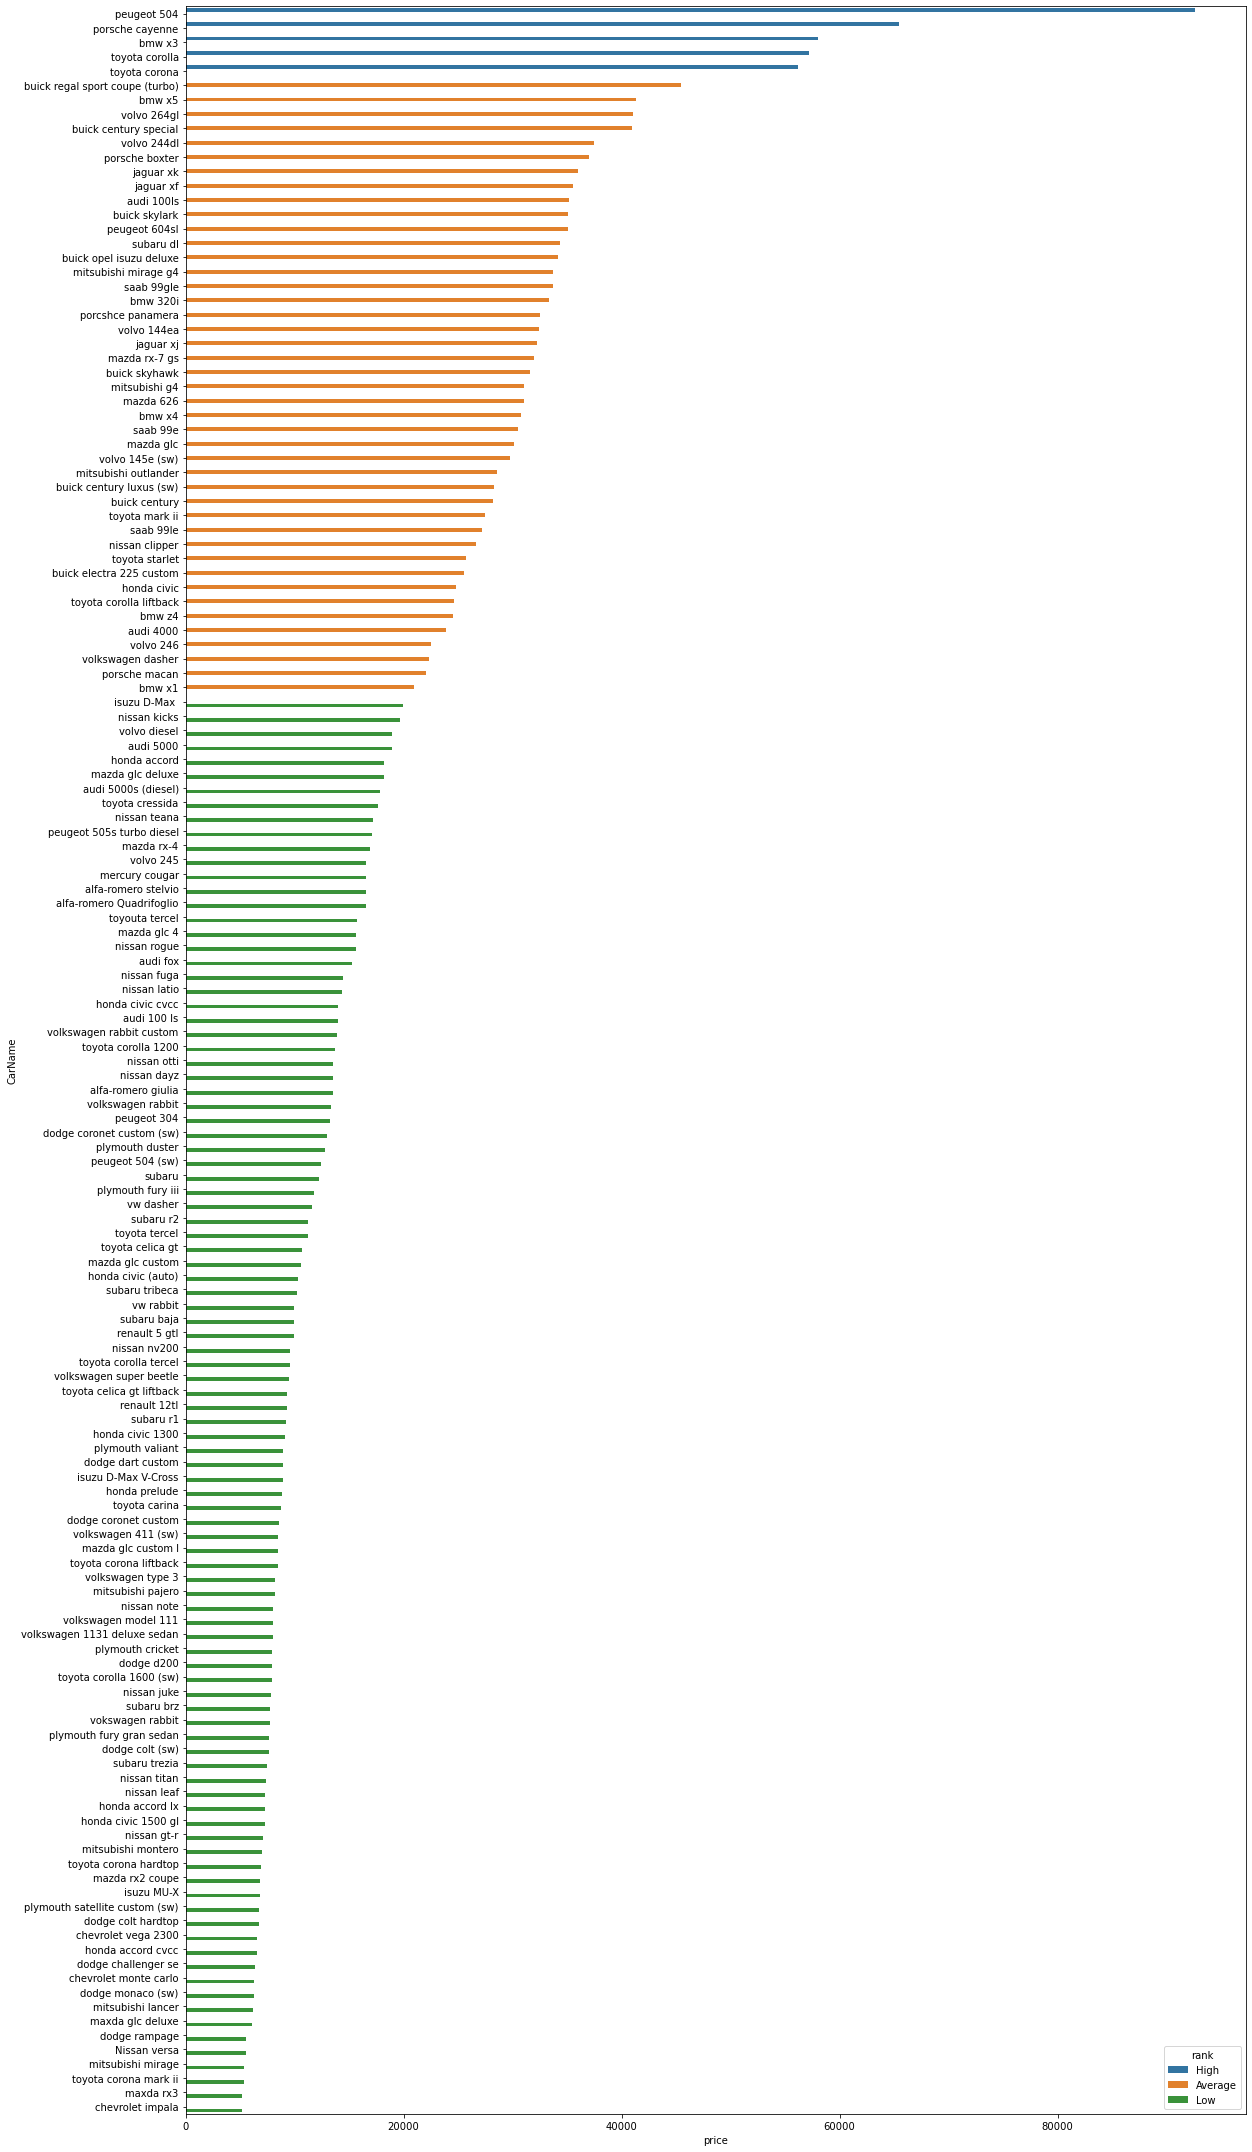

In [18]:
# Biểu đồ CarName với Price 

# chỉnh figsize cho biểu đồ
plt.figure(figsize=(17.5, 30))

# lọc cột CarName với tổng giá bằng groupby và sắp xếp lại bảng từ lớn xuống nhỏ
price_name= data.groupby('CarName')['price'].sum().sort_values(ascending=False).to_frame()

#
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(np.array(price_name.price).reshape(-1,1))

# Phân loại xe
price_name['rank'] = kmeans.labels_
price_name['rank'].replace(0,'Average',inplace=True)
price_name['rank'].replace(1,'Low',inplace=True)
price_name['rank'].replace(2,'High',inplace=True)

# Dựng biểu đồ
sns.barplot(x = price_name.price, y = price_name.index, orient = 'h', hue = price_name['rank'])
plt.tight_layout()
plt.show()

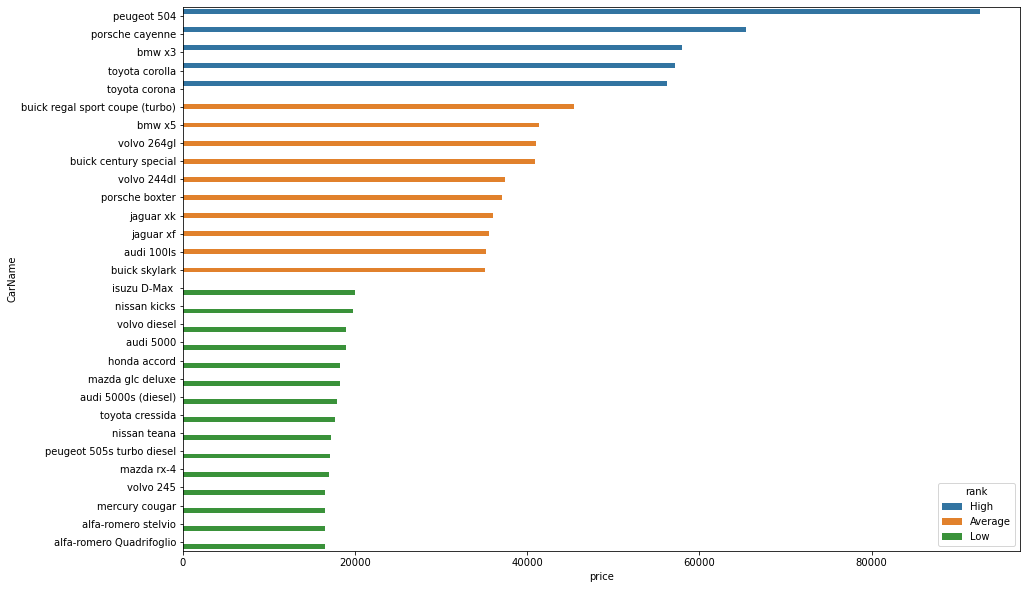

In [19]:
# Tạo data mới tổng hợp 5 loại bán chạy nhất, 10 loại trung bình, 15 loại kém
# lọc số lượng xe từ các phân khúc của data price_name
price_name1 = price_name[(price_name['rank']=='High')][:5]
price_name2 = price_name[(price_name['rank']=='Average')][:10]
price_name3 = price_name[(price_name['rank']=='Low')][:15]

# gộp các phân khúc lại thành 1 bảng
price_name4 = pd.concat([price_name1,price_name2,price_name3], axis=0)
# price_name4 = price_name4.sort_values(by='price',ascending=False)

# Dựng biểu đồ
plt.figure(figsize=(15, 10))
price_name4['rank'].replace(0,'Low',inplace=True)
price_name4['rank'].replace(1,'High',inplace=True)
price_name4['rank'].replace(2,'Average',inplace=True)
sns.barplot(x = price_name4.price, y = price_name4.index, orient = 'h', hue = price_name4['rank'])
# plt.tight_layout()
plt.show()

- Qua biểu đồ Hãng xe và loại Xe ta có thể thấy hãng xe top đầu cũng không có đứng đầu ở biểu đồ loại Xe vì có nhiều yếu tố khác nhau ,cũng như cầu khác nhau của khách hàng 

In [20]:
data[data['CarName']=='peugeot 504'].sort_values(by='price',ascending=False)

,car_ID,symboling,car_company_name,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
116,117,0,peugeot,peugeot 504,diesel,turbo,4,sedan,rwd,front,...,152,idi,3.70,3.52,21.0,95,4150,28,33,17950.0
113,114,0,peugeot,peugeot 504,gas,std,4,wagon,rwd,front,...,120,mpfi,3.46,2.19,8.4,95,5000,19,24,16695.0
115,116,0,peugeot,peugeot 504,gas,std,4,sedan,rwd,front,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,16630.0
111,112,0,peugeot,peugeot 504,gas,std,4,sedan,rwd,front,...,120,mpfi,3.46,2.19,8.4,95,5000,19,24,15580.0
110,111,0,peugeot,peugeot 504,diesel,turbo,4,wagon,rwd,front,...,152,idi,3.70,3.52,21.0,95,4150,25,25,13860.0
107,108,0,peugeot,peugeot 504,gas,std,4,sedan,rwd,front,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,11900.0


- Thông qua chỉ số của loại xe peugeot 504 tuy là xe được sản xuất từ năm 1968-1983 ta có thể mức độ an toàn thuộc mức tương đối an toàn và các chỉ số so với các loại xe hạng sang mới hơn cũng không khác là bao nhiêu. Hãng xe cũng thuộc hãng xe lớn của Pháp và nổi tiếng trên thế giới => tổng doanh thu lớn hơn loại xe khác

# 2.1 Tiến hành phân tích mối liên hệ của từng thuộc tính với price bằng các biểu đồ mô tả tần số, tần suất, các phép kiểm định
- kiểm tra từng thuộc tính định lượng có tương quan với cột price bằng phương pháp kiểm định giả thuyết Pearsonr 

Thuộc tính carlength và price có tương quan tuyến tính,với mức độ ý nghĩa là 0.5, r=0.683, pvalue=0.000


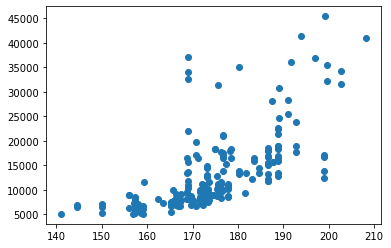

Thuộc tính carwidth và price có tương quan tuyến tính,với mức độ ý nghĩa là 0.5, r=0.759, pvalue=0.000


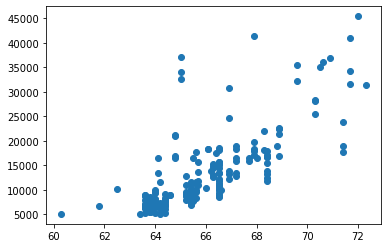

Thuộc tính curbweight và price có tương quan tuyến tính,với mức độ ý nghĩa là 0.5, r=0.835, pvalue=0.000


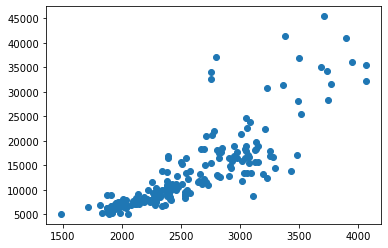

Thuộc tính cylindernumber và price có tương quan tuyến tính,với mức độ ý nghĩa là 0.5, r=0.718, pvalue=0.000


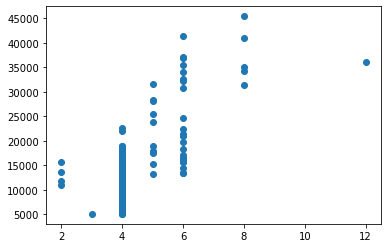

Thuộc tính enginesize và price có tương quan tuyến tính,với mức độ ý nghĩa là 0.5, r=0.874, pvalue=0.000


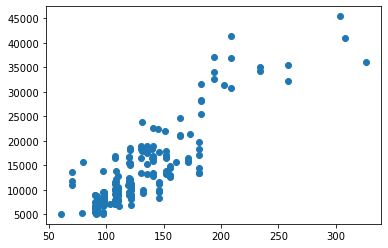

Thuộc tính horsepower và price có tương quan tuyến tính,với mức độ ý nghĩa là 0.5, r=0.808, pvalue=0.000


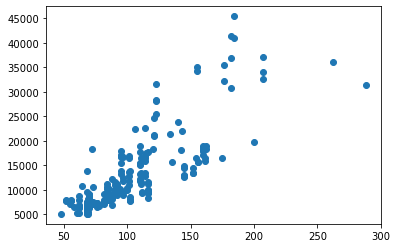

Thuộc tính citympg và price có tương quan đối xứng,với mức độ ý nghĩa là 0.5, r=-0.686, pvalue=0.000


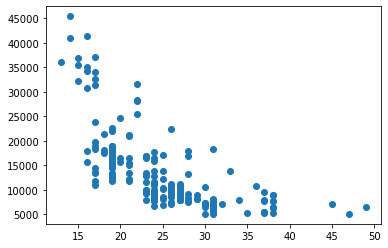

Thuộc tính highwaympg và price có tương quan đối xứng,với mức độ ý nghĩa là 0.5, r=-0.698, pvalue=0.000


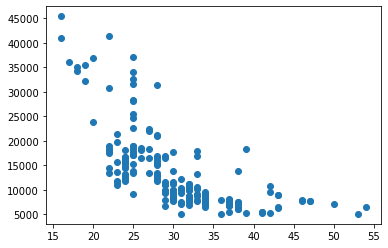

In [21]:
# Dùng for kiểm tra từng thuộc tính định lượng có tương quan với cột price bằng phương pháp kiểm định giả thuyết Pearsonr
for i in data.columns:
    if data[f'{i}'].dtypes == 'float64' or data[f'{i}'].dtypes =='int64' or data[f'{i}'].dtypes =='int32':
        r, pvalue = stats.pearsonr(data[i], data['price'])
        if r >= 0.6 and i != 'price' :
            print(f'Thuộc tính {i} và price có tương quan tuyến tính,với mức độ ý nghĩa là 0.5, r=%.3f, pvalue=%.3f' % (r, pvalue))
            plt.scatter(x=data[i], y= data['price'])
            plt.show()
        elif r <= - 0.6 and i != 'price':
            print(f'Thuộc tính {i} và price có tương quan đối xứng,với mức độ ý nghĩa là 0.5, r=%.3f, pvalue=%.3f' % (r, pvalue))
            plt.scatter(x=data[i], y= data['price'])
            plt.show()

- Dùng vòng lặp và phương pháp kiểm định giá thuyết Pearsonr ta có 8 những cột trên có mức tương quan với Price:
    - carlength, carwidth, curbweight, cylindernumber, enginesize, horsepower, citympg, highwaympg với mức R >= 0.6
- Sau đó chúng ta xây dựng thêm biểu đồ.
    -  Dùng biểu đồ scatter để thể hiện.
- Chọn lọc ra 4 chỉ số cao nhất và price để đưa vào mô hình đoán gia.
    - carwidth, curbweight, enginesize, horsepower
    - Dùng mô hình dữ báo kiểu mới pipeline

In [22]:
Data1 = data.loc[:,['price', 'carwidth','curbweight','enginesize','horsepower']]

#Xây dựng mô hình dự báo:
#Chia ngẫu nhiên dữ liệu quan sát được thành hai phần dữ liệu huấn luyện và dữ liệu kiểm tra
from sklearn.model_selection import train_test_split

train, test = train_test_split(Data1, train_size = 0.8, test_size=0.2)

#Sử dụng pipeline (kiểu mới)
#Tạo chuẩn hóa
from sklearn.preprocessing import StandardScaler
zscore = StandardScaler(with_mean=False)

#Tạo model Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#Tạo pipeline
from sklearn.pipeline import Pipeline
pipeline = Pipeline([("StandardScaler", zscore),
                     ("linear_regression", model)])

#Xây dựng mô hình hồi quy tuyến tính đa biến với biến dự báo là price
#các biến đầu vào là các thông số kỹ thuật còn lại  đến price

X_train = train.drop(columns=['price'])
y_train = train.loc[:,'price']

#Fit
pipeline.fit(X_train,y_train)

#Predict
y_ = pipeline.predict(test.drop(columns=['price']))

#Tính r2score
import sklearn.metrics as metrics
print(metrics.r2_score(test.loc[:,'price'], y_))

0.7676772370619195


fueltype và price


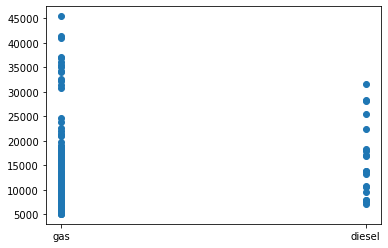

aspiration và price


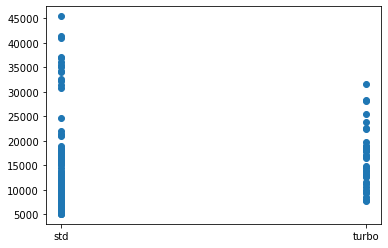

carbody và price


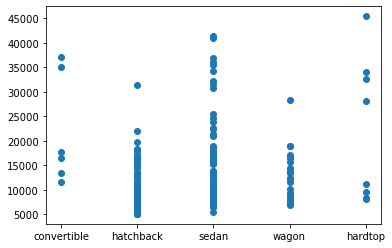

drivewheel và price


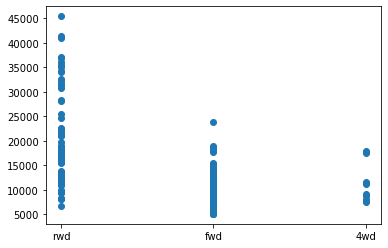

enginelocation và price


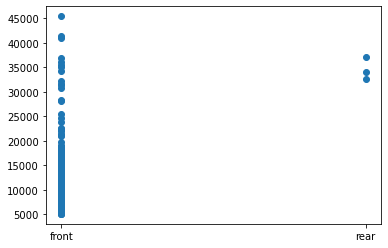

enginetype và price


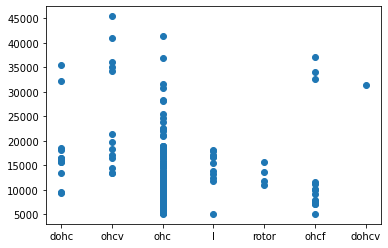

fuelsystem và price


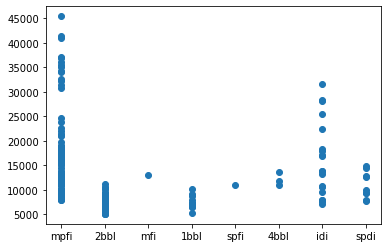

In [23]:
# kiểm tra các biến định tính với price
for i in data.columns:
    if data[f'{i}'].dtypes == 'object':
        if i != 'car_company_name' and i != 'CarName':
            print(i,'và price')
            plt.scatter(x=data[i], y= data['price'])
            plt.show()

# 3. Nhận xét các thuộc tính gây ảnh hưởng tới giá
- Thông qua phân tích của phần 2 và mô hình thì ta có thể thấy những yếu tố hay thuộc tính ảnh hưởng đến giá:
    - Tên Hãng Xe
    - Thông tin chỉ số của Động cơ xe và mã lực của xe
    - Hệ thống nguyên liệu của xe,Số nguyên liệu tiêu hao của 1 xe trên nhiều chặng đường khác nhau
    - Ngoại hình xe, trọng lượng xe.

# 4. Vẽ biểu đồ heatmap biểu diễn mức độ tương quan giữa các biến định lượng (xem xét có những biến nào có tương quan lớn với nhau, chỉ giữa lại 1 trong các biến đó đưa vào mô hình)

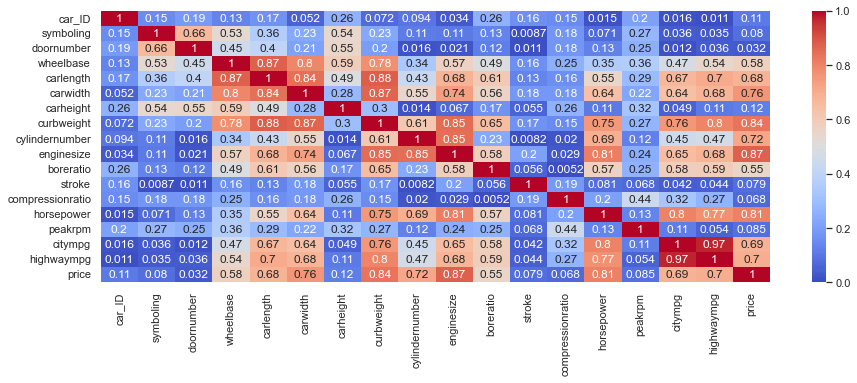

In [24]:
# Dùng hàm corr() tạo ma trận liên quan với các cột trong 1 tệp dữ liệu
Cata_corr = data.corr()
# np.abs sử dụng để tính ra trị tuyệt đối của ma trận corr
Cata_corr = np.abs(Cata_corr)

# Tạo Heatmap và chỉnh sửa biểu đồ dễ nhìn hơn.
sns.set(rc={'figure.figsize':(15,5)})
sns.heatmap(Cata_corr, vmax =1,vmin=0, cmap='coolwarm', annot = True)
plt.show()

R_square của citympg và highwaympg là: 0.9434956498266844


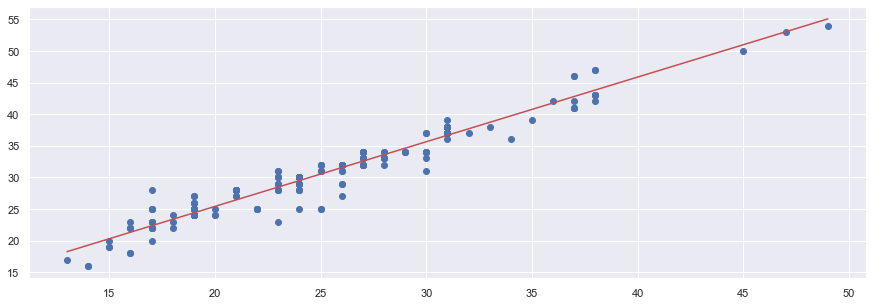

In [25]:
# Khai báo thư viện xây dựng mô hình
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# Sử dụng hồi quy tuyến tính một biến
# đưa biến sau khi chọn ở biểu đồ Heatmap
X = data['citympg']
y = data['highwaympg']

# Xây dựng mô hình LinearRegression
model = LinearRegression()
model.fit(X.values.reshape(-1,1), y.ravel())
predictions = model.predict(X.values.reshape(-1,1))

# Chỉ số R_square
print('R_square của citympg và highwaympg là:', model.score(X.values.reshape(-1,1), y))

# dựng biểu đồ với điểm dự đoán
plt.scatter(X, y)
plt.plot([min(X),max(X)], [min(predictions),max(predictions)], color='r')
plt.show()

In [26]:
# xây dựng mô hình với statsAPI.OLS
X = data['citympg'].values.reshape(-1,1)
y = data['highwaympg']

exog = sm.add_constant(X)
estimator = sm.OLS(y, exog).fit()

print(estimator.summary())

                            OLS Regression Results                            
Dep. Variable:             highwaympg   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     3390.
Date:                Sat, 11 Feb 2023   Prob (F-statistic):          1.25e-128
Time:                        22:34:30   Log-Likelihood:                -391.41
No. Observations:                 205   AIC:                             786.8
Df Residuals:                     203   BIC:                             793.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9654      0.457     10.854      0.0

# 5. Tiến hành mã hóa tạo ra các biến dumy từ các biến category (thang đo nominal) ban đầu

In [27]:
data1 = data.drop(['car_ID','CarName','enginelocation'], axis=1)
categories = data1.select_dtypes(include=['object'])
df_dummies = pd.get_dummies(categories)
data1 = pd.concat([data1, df_dummies], axis=1)
data1 = data1.drop(categories, axis=1)

df2 = data1.values

# s_scaler = MinMaxScaler()
# data_scaled = s_scaler.fit_transform(df2)

s_scaler = StandardScaler()
data_scaled = s_scaler.fit_transform(df2)

df_scaled = pd.DataFrame(data_scaled, columns=data1.columns)


# 6. Xây dựng mô hình hồi quy tuyến tính bằng thư viện sklearn, sử dụng thêm feature selection để chọn các thuộc tính tốt nhất và Xây dựng mô hình hồi quy tuyến tính trên các biến được chọn bởi phương pháp feature selection.

In [28]:
# Sử dụng thư viện model_selection dùng hàm train_test_split để chia ngẫu nhiên tập dữ liệu Train và Test
X_train, X_test = train_test_split(df_scaled, train_size = 0.8, test_size=0.2, random_state=0)

# Các biến đầu vào là các thông số kỹ thuật còn lại  đến price
X_train1 = X_train.drop('price', axis=1)
y_train1 = X_train['price']

X_test1 = X_test.drop('price', axis=1)
y_test1 = X_test['price']

# Tạo model Linear Regression
model1 = LinearRegression()

# Sử dụng RFE để chọn 10 thuộc tính tốt nhất để đưa vào mô hình
rfe = RFE(model1, n_features_to_select=10)
rfe = rfe.fit(X_train1, y_train1)

best_features = X_train1.columns[rfe.support_]
X_train1 = X_train[best_features]

# thông số R_square 
model1.fit(X_train1, y_train1.ravel())
print('Thông số R_square ',model1.score(X_train1, y_train1.ravel()))

# chọn 10 thuộc tính cho X_test
X_test1 = X_test1[best_features]
# score = model1.score(X_test1, y_test1)
# print('Thông số R_square test',score)


# xây dựng mô hình như statsAPI.OLS
# exog = sm.add_constant(X_train1)
# estimator = sm.OLS(y_train1.ravel(), exog).fit()
# print(estimator.summary())

Thông số R_square  0.9451817997270088


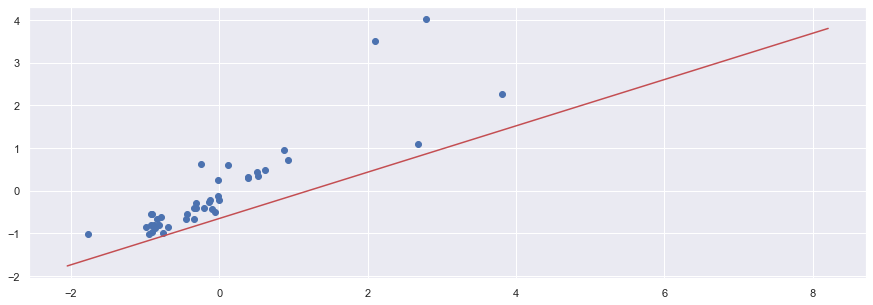

In [29]:
# Making predictions model1
y_predict1 = model1.predict(X_test1)

# điểm thực tế
plt.scatter(y_predict1,y_test1, color='b')

# điểm dự đoán
plt.plot([X_train1.values.reshape(-1,10).min(),X_train1.values.reshape(-1,10).max()],[y_predict1.min(),y_predict1.max()], color='r')
plt.show()

# 7. Có thể sử dụng thêm các thư viện khác để xây dựng mô hình như statsAPI.OLS

In [30]:
# Các biến đầu vào là các thông số kỹ thuật còn lại  đến price
X_train2 = df_scaled.drop(columns='price').iloc[:165, :65].values.reshape(-1,65)
y_train2 = df_scaled['price'][:165]

# Tạo x y test
X_test2 = df_scaled.drop(columns='price').iloc[165:, :65].values.reshape(-1,65)
y_test2 = df_scaled['price'][165:]

# Tạo model Linear Regression
model2 = LinearRegression()
model2.fit(X_train2, y_train2.ravel())

# xây dựng mô hình như statsAPI.OLS
exog = sm.add_constant(X_train2)
estimator = sm.OLS(y_train2, exog).fit()
print(estimator.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     80.68
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           4.30e-68
Time:                        22:34:30   Log-Likelihood:                 60.429
No. Observations:                 165   AIC:                            -8.857
Df Residuals:                     109   BIC:                             165.1
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0472      0.050      0.945      0.3

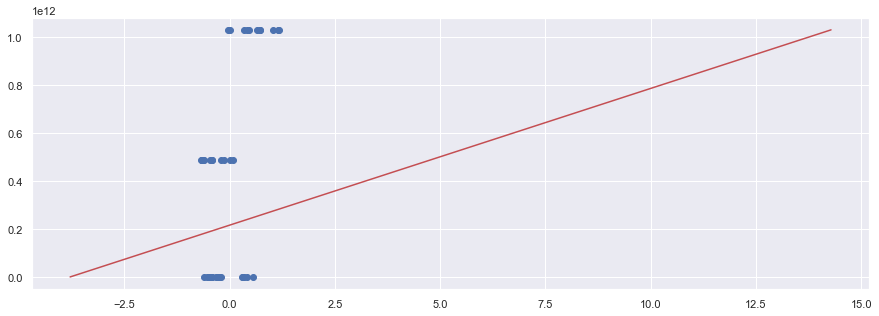

In [31]:
# Making predictions model2
y_predict2 = model2.predict(X_test2)

# điểm thực tế
plt.scatter(y_test2,y_predict2, color='b')
# plt.scatter(y_predict1,y_test1, color='r')

# điểm dự đoán
plt.plot([X_train2.min(),X_train2.max()],[y_predict2.min(),y_predict2.max()], color='r')
plt.show()

# 8. Đánh giá chất lượng 2 mô hình dựa trên các thông số như R_square, Tổng bình phương sai số trung bình.

In [32]:
# Model mô hình thứ nhất

# thông số R_square model 1
print('Thông số R_square Train model 1',model1.score(X_train1, y_train1.ravel()))
print('Thông số R_square Test model 1',model1.score(X_test1, y_test1.ravel()))

# Tổng bình phương sai số trung bình(MSE)

y_predict = model1.predict(X_train1)
mse1 = mean_squared_error(y_train1, y_predict)
print("Mean Squared Error Train Model 1:", mse1)

y_predict1 = model1.predict(X_test1)
mse2 = mean_squared_error(y_test1, y_predict1)
print("Mean Squared Error Test Model 1:", mse2)

Thông số R_square Train model 1 0.9451817997270088
Thông số R_square Test model 1 0.7753759565114566
Mean Squared Error Train Model 1: 0.05181411949224915
Mean Squared Error Test Model 1: 0.27380658259181745


In [33]:
# thông số R_square model 2
print('Thông số R_square train model 2 ',model2.score(X_train2, y_train2.ravel()))

print('Thông số R_square test model 2 ',model2.score(X_test2, y_test2.ravel()))

# Tổng bình phương sai số trung bình(MSE) model 2
y_predict2 = model2.predict(X_train2)
mse2 = mean_squared_error(y_train2, y_predict2)
print("Mean Squared Error Train model 2:", mse2)

y_predict3 = model2.predict(X_test2)
mse3 = mean_squared_error(y_test2, y_predict3)
print("Mean Squared Error test model 2:", mse3)

Thông số R_square train model 2  0.9758258561433835
Thông số R_square test model 2  -1.2897536882915544e+24
Mean Squared Error Train model 2: 0.0283801253163253
Mean Squared Error test model 2: 3.63007146288063e+23
